<a href="https://colab.research.google.com/github/Francisco2963/DBSCAN-Core-/blob/main/DBSCAN_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
# Identificar y mostrar los outliers en cada columna
def calcular_outliers(df, columna):
    if df[columna].dtype == 'object':
        return None, None, None, None
    else:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < Q1 - 1.5 * IQR) | (df[columna] > Q3 + 1.5 * IQR)]
        return outliers, Q1, Q3, IQR

# Calcular outliers para todas las columnas numéricas
for col in df.columns:
    outliers, Q1, Q3, IQR = calcular_outliers(df, col)
    print(f"Outliers en {col}: {len(outliers)}")

Outliers en Channel: 0
Outliers en Region: 0
Outliers en Fresh: 20
Outliers en Milk: 28
Outliers en Grocery: 24
Outliers en Frozen: 43
Outliers en Detergents_Paper: 30
Outliers en Delicassen: 27


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

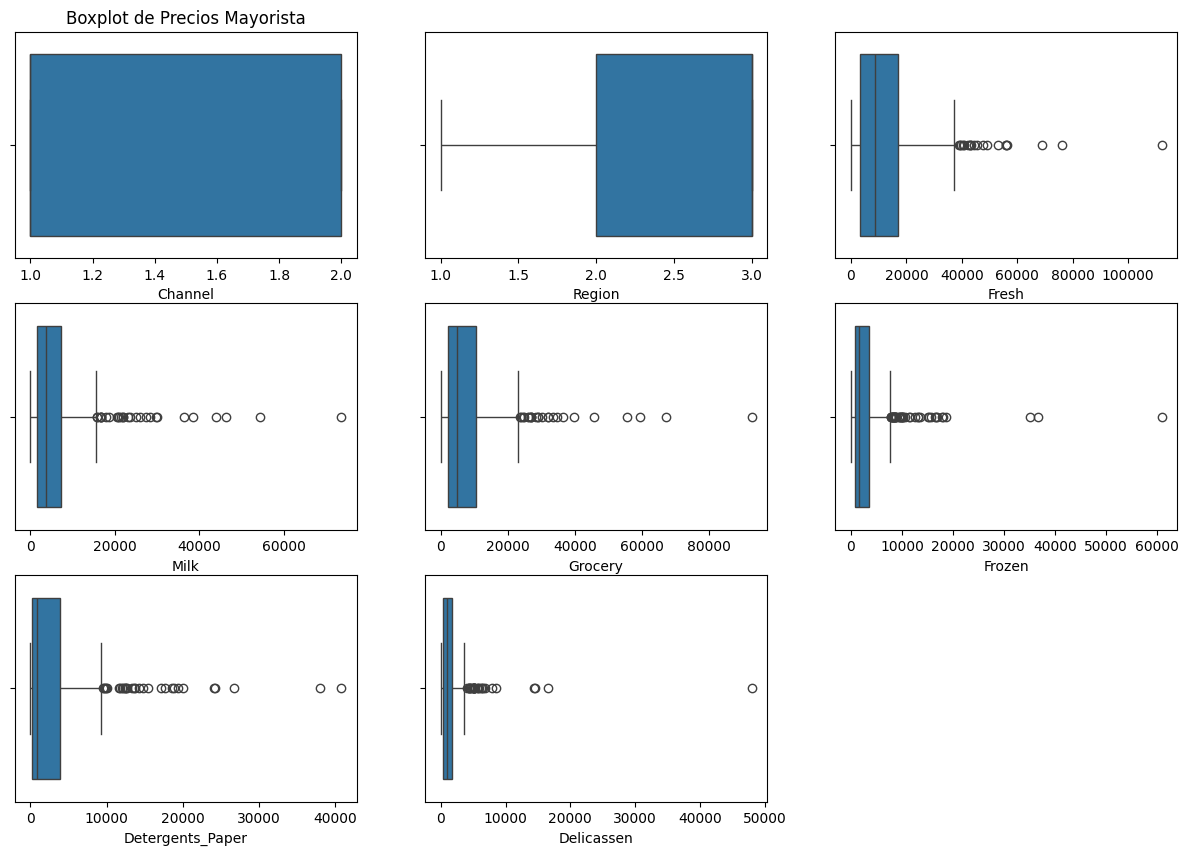

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df['Channel'])
plt.title('Boxplot de Precios Mayorista')
plt.xlabel('Channel')

plt.subplot(3,3,2)
sns.boxplot(x=df['Region'])
plt.xlabel('Region')

plt.subplot(3,3,3)
sns.boxplot(x=df['Fresh'])
plt.xlabel('Fresh')

plt.subplot(3,3,4)
sns.boxplot(x=df['Milk'])
plt.xlabel('Milk')

plt.subplot(3,3,5)
sns.boxplot(x=df['Grocery'])
plt.xlabel('Grocery')

plt.subplot(3,3,6)
sns.boxplot(x=df['Frozen'])
plt.xlabel('Frozen')

plt.subplot(3,3,7)
sns.boxplot(x=df['Detergents_Paper'])
plt.xlabel('Detergents_Paper')

plt.subplot(3,3,8)
sns.boxplot(x=df['Delicassen'])
plt.xlabel('Delicassen')

plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [ ]:
# Calcular los cuartiles
Q1 = df['Fresh'].quantile(0.25)
Q3 = df['Fresh'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df['Fresh'] < lower_bound) | (df['Fresh'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
outliers

Outliers:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
29,1,3,43088,2100,2609,1200,1107,823
39,1,3,56159,555,902,10002,212,2916
47,2,3,44466,54259,55571,7782,24171,6465
52,2,3,40721,3916,5876,532,2587,1278
87,1,3,43265,5025,8117,6312,1579,14351
103,1,3,56082,3504,8906,18028,1480,2498
125,1,3,76237,3473,7102,16538,778,918
129,1,3,42312,926,1510,1718,410,1819
176,1,3,45640,6958,6536,7368,1532,230
181,1,3,112151,29627,18148,16745,4948,8550


In [ ]:
# Calcular los cuartiles
Q1 = df['Frozen'].quantile(0.25)
Q3 = df['Frozen'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df['Frozen'] < lower_bound) | (df['Frozen'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
outliers

Outliers:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
22,1,3,31276,1917,4469,9408,2381,4334
39,1,3,56159,555,902,10002,212,2916
40,1,3,24025,4332,4757,9510,1145,5864
47,2,3,44466,54259,55571,7782,24171,6465
70,1,3,16705,2037,3202,10643,116,1365
72,1,3,4420,5139,2661,8872,1321,181
73,2,3,19899,5332,8713,8132,764,648
88,1,3,7864,542,4042,9735,165,46
91,1,3,12754,2762,2530,8693,627,1117
93,1,3,11314,3090,2062,35009,71,2698


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Preprocesamiento: Estandarizar los datos (sin incluir las columnas 'Channel' y 'Region')
X = df.iloc[:, 2:]  # Tomar sólo las columnas de gastos en productos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reducción de dimensionalidad con PCA para visualización
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para visualización
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Definir una función para aplicar DBSCAN con diferentes parámetros y evaluar con Silhouette Score
def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)  # Utilizar datos estandarizados
    if len(set(labels)) > 1:  # Si no todos los puntos son ruido
        score = silhouette_score(X_scaled, labels)
        return score
    else:
        return -1  # Score negativo si todos los puntos son considerados ruido

In [ ]:
# Realizar Grid Search para encontrar los mejores parámetros de DBSCAN
eps_values = np.arange(0.1, 1.0, 0.05)
min_samples_values = range(3, 10)
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        score = dbscan_silhouette(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

In [ ]:
# Obtener los mejores parámetros encontrados
best_eps, best_min_samples = best_params
print(f"Mejores parámetros encontrados: eps={best_eps}, min_samples={best_min_samples} con un Silhouette Score de {best_score}")

Mejores parámetros encontrados: eps=0.9500000000000003, min_samples=4 con un Silhouette Score de 0.5722075147932343


In [ ]:
# Aplicar DBSCAN con los mejores parámetros
dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan_optimized = dbscan_optimized.fit_predict(X_scaled)

In [ ]:
# Añadir los labels al dataframe original para visualización y análisis posterior
df['Cluster'] = labels_dbscan_optimized


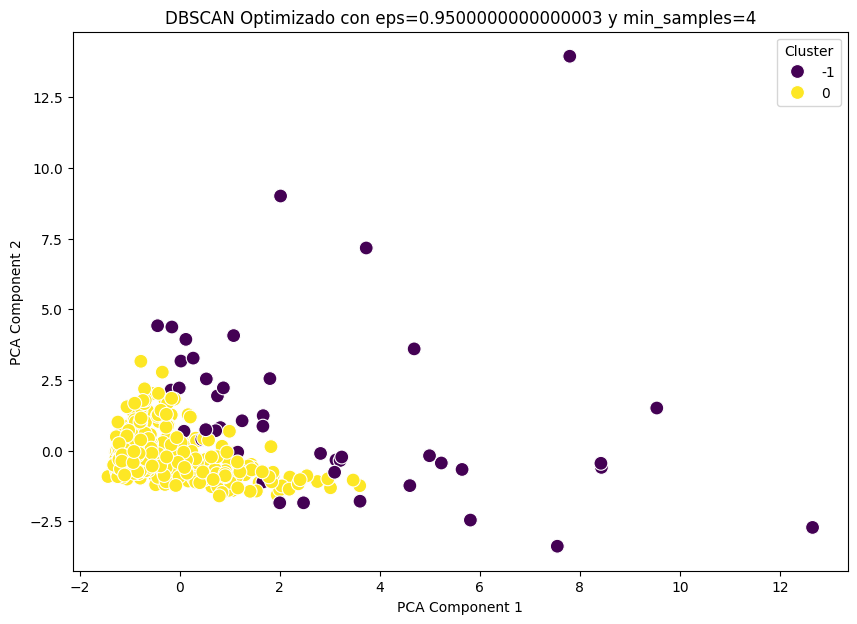

In [ ]:
# Visualización de clusters utilizando PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan_optimized, palette='viridis', s=100)
plt.title(f"DBSCAN Optimizado con eps={best_eps} y min_samples={best_min_samples}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

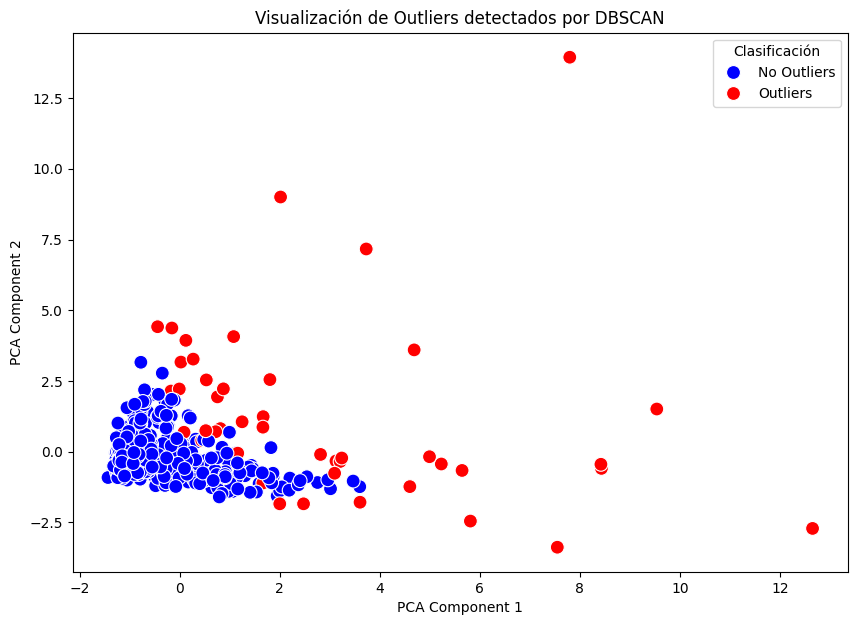

In [ ]:
# Visualización de los outliers en los datos
outliers = df[df['Cluster'] == -1]  # Identificar los outliers como el cluster -1
plt.figure(figsize=(10, 7))
# Crear el gráfico de dispersión
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=(labels_dbscan_optimized == -1), palette={False: 'blue', True: 'red'}, s=100)

# Actualizar la leyenda manualmente
handles, labels = scatter.get_legend_handles_labels()  # Obtener los manejadores y etiquetas actuales
# Reemplazar la leyenda con etiquetas correctas
scatter.legend(handles, ['No Outliers', 'Outliers'], title='Clasificación')

plt.title('Visualización de Outliers detectados por DBSCAN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Análisis Final: Asignación de clusters y outliers
# Mostrar los registros de los outliers detectados
outliers = df[df['Cluster'] == -1]
print(f"Total de outliers detectados por DBSCAN: {len(outliers)}")
outliers.head()

Total de outliers detectados por DBSCAN: 45


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
2,2,3,6353,8808,7684,2405,3516,7844,-1
22,1,3,31276,1917,4469,9408,2381,4334,-1
23,2,3,26373,36423,22019,5154,4337,16523,-1
24,2,3,22647,9776,13792,2915,4482,5778,-1
28,2,3,4113,20484,25957,1158,8604,5206,-1


In [ ]:
# Mostrar el número de puntos por cluster
print("\nNúmero de puntos en cada cluster:\n", df['Cluster'].value_counts())


Número de puntos en cada cluster:
 Cluster
 0    395
-1     45
Name: count, dtype: int64


COMENTARIO

El cluster principal (0) contiene la mayoría de los clientes (395), mientras que el cluster -1 agrupa a 45 puntos considerados como outliers.
La visualización con PCA muestra que los outliers están más dispersos en comparación con los puntos del cluster principal, lo que sugiere que estos puntos tienen patrones de compra distintos al resto de la base de clientes.

Los outliers representaN clientes con comportamientos inusuales o atípicos.

Estos clientes pueden ser empresas o clientes individuales con patrones de compra únicos (como compras excesivas en categorías específicas).

Desde una perspectiva comercial, estos outliers podrían ser:

Oportunidades comerciales: Si los outliers corresponden a clientes con un alto nivel de gasto en ciertos productos, podrían ser tratados como clientes de alto valor con estrategias de venta personalizadas.

Riesgos: En caso de que los comportamientos de compra sean erráticos o anómalos, podrían representar clientes con alta variabilidad, que no generan ventas consistentes o podrían estar en riesgo de abandono.

Los clusters formados parecen tener sentido desde una perspectiva comercial: el cluster principal agrupa a la mayoría de los clientes con comportamientos similares, mientras que los outliers representan clientes con patrones atípicos, como compras en grandes volúmenes de categorías específicas.

Justificación de Parámetros:

El valor de eps=0.95 se eligió porque determina la distancia máxima para considerar dos puntos como vecinos. Este valor es relativamente alto, lo que permite formar grupos más amplios y capturar los principales comportamientos.


El valor min_samples=4 se seleccionó porque se requiere un número mínimo de puntos para formar un cluster denso. Un valor bajo ayuda a DBSCAN a capturar pequeños grupos de clientes con comportamientos similares.